In [31]:
import pyNN.spiNNaker as p
import pylab

p.setup(timestep=1.0)

2017-06-22 13:13:31 INFO: sPyNNaker (c) 2016 APT Group, University of Manchester
2017-06-22 13:13:31 INFO: Release version 3.0.0() - September 2016. Installed in folder /home/nicolas/master_thesis/spinnaker_lsm/spinnaker_virtenv/venv/local/lib/python2.7/site-packages
2017-06-22 13:13:31 INFO: Will search these locations for binaries: /home/nicolas/master_thesis/spinnaker_lsm/spinnaker_virtenv/venv/local/lib/python2.7/site-packages/spinn_front_end_common/common_model_binaries : /home/nicolas/master_thesis/spinnaker_lsm/spinnaker_virtenv/venv/local/lib/python2.7/site-packages/spynnaker/pyNN/model_binaries : /home/nicolas/master_thesis/spinnaker_lsm/spinnaker_virtenv/venv/local/lib/python2.7/site-packages/spynnaker/pyNN/model_binaries : /home/nicolas/master_thesis/spinnaker_lsm/spinnaker_virtenv/venv/local/lib/python2.7/site-packages/spynnaker/pyNN/model_binaries
2017-06-22 13:13:31 INFO: Setting appID to 30.
2017-06-22 13:13:31 INFO: Setting time scale factor to 1.
2017-06-22 13:13:31 IN

0

In [32]:
pop_1 = p.Population(1, p.IF_curr_exp, {}, label="pop_1")
input = p.Population(1, p.SpikeSourceArray,
        {'spike_times': [[0,3,5]]}, label="input")
input_proj = p.Projection(input, pop_1, p.OneToOneConnector(
    weights=5.0, delays=1), target="excitatory")

In [34]:
pop_1.record()
pop_1.record_v()
p.run(10)

2017-06-22 13:13:36 INFO: Starting execution process
2017-06-22 13:13:36 INFO: Creating transceiver for 192.168.240.36
2017-06-22 13:13:36 INFO: Working out if machine is booted
2017-06-22 13:13:37 INFO: Found board with version [Version: SC&MP 3.0.1 at SpiNNaker:0:0:0 (built Wed Jul 20 11:07:23 2016)]
2017-06-22 13:13:37 INFO: Machine communication successful
2017-06-22 13:13:37 INFO: Detected a machine on ip address 192.168.240.36 which has 72 cores and 8 links
2017-06-22 13:13:37 INFO: Time 0:00:00.767978 taken by FrontEndCommonMachineGenerator
Allocating virtual identifiers
|0                           50%                         100%|
2017-06-22 13:13:37 INFO: Time 0:00:00.089148 taken by MallocBasedChipIDAllocator
2017-06-22 13:13:37 INFO: Time 0:00:00.000224 taken by FrontEndCommonApplicationGraphNetworkSpecificationReport
Partitioning graph vertices
|0                           50%                         100%|
Partitioning graph edges
|0                           50%          

2017-06-22 13:13:40 INFO: Application has run to completion
2017-06-22 13:13:40 INFO: Time 0:00:00.283817 taken by FrontEndCommonApplicationRunner


Getting membrane voltage for pop_1
|0                           50%                         100%|

[[  0.           0.         -65.0019837 ]
 [  0.           1.         -65.0019837 ]
 [  0.           2.         -60.57908872]
 [  0.           3.         -57.17377239]
 [  0.           4.         -54.59105197]
 [  0.           5.         -65.0019837 ]
 [  0.           6.         -65.0019837 ]
 [  0.           7.         -55.98733482]
 [  0.           8.         -65.0019837 ]
 [  0.           9.         -65.0019837 ]]


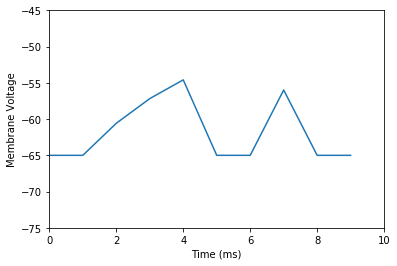

Getting spikes for pop_1
|0                           50%                         100%|


[[ 0.  4.]
 [ 0.  7.]]


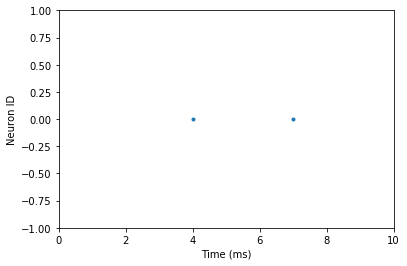

In [37]:
v= pop_1.get_v()
print v
time = [i[1] for i in v if i[0] == 0]
membrane_voltage = [i[2] for i in v if i[0] == 0]
pylab.plot(time, membrane_voltage)
pylab.xlabel("Time (ms)")
pylab.ylabel("Membrane Voltage")
pylab.axis([0, 10, -75, -45])
pylab.show()

exc_spikes = pop_1.getSpikes(compatible_output=True)
print exc_spikes

spike_time = [i[1] for i in exc_spikes]
spike_id = [i[0] for i in exc_spikes]
pylab.plot(spike_time, spike_id, ".")
pylab.xlabel("Time (ms)")
pylab.ylabel("Neuron ID")
pylab.axis([0, 10, -1, 1])
pylab.show()

In [ ]:
p.FromListConnector()